In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# from google.colab import drive
# drive.mount('/content/drive')


In [83]:
df = pd.read_csv(r'C:\Users\caio.guedes_libercap\Documents\Dev\CESAR\Módulo 1\Estatística Descritiva\Projeto analise de credito\dataset\Case_Data.csv')

In [84]:
df.head(3)

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
0,1.0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,...,INDIVIDUAL,NaN,NaN,0,0,52303,41000,NaN,1.0,0.0
1,2.0,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,...,INDIVIDUAL,NaN,NaN,0,332,175731,13100,NaN,1.0,0.0
2,3.0,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,...,INDIVIDUAL,NaN,NaN,0,0,202012,16300,NaN,1.0,0.0


In [85]:
cols = ['Row ID', 'id', 'funded_amnt', 'purpose', 'next_pymnt_d', 'collections_12_mths_ex_med', 'Unnamed: 50', '36months', '60months']
df.drop(columns=cols, inplace=True)

In [86]:
df['emp_length'].fillna('0', inplace=True)
df['term'] = df['term'].apply(lambda x: x.replace('months', ''))
df['term'] = df['term'].astype(int)
df['emp_length'] = df['emp_length'].apply(lambda x: x.replace('years', '').replace('< ','<').replace('year', '').strip())
# df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0.0, inplace=True)
# df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].fillna(0.0, inplace=True)
# df['mths_since_last_delinq'] = df['mths_since_last_delinq'].apply(lambda x: int(x))
# df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].apply(lambda x: int(x))

In [87]:
df_limpo = df.copy(deep=True)

Qual a probabilidade do solicitante do empréstimo ter casa própria?

- Mortgage = Financiado
- Rent = Alugado
- Own = Casa própria
- Any = Outros

In [88]:
casa_propria = len(df_limpo[df_limpo['home_ownership'] == 'OWN'])
probabilidade_casa_propria = casa_propria/len(df_limpo)
probabilidade_casa_propria

print(f'A probabilidade do solicitante ter casa própria é de {round(probabilidade_casa_propria*100,2)}%')

A probabilidade do solicitante ter casa própria é de 11.05%


### Qual a probabilidade de um inadimplente solicitar empréstimo para pagar o cartão de crédito?

`Usaremos o cálculo de probabilidade condicional para este caso`

$ P(A∣B) = P(A∩B)/P(B) $​
, onde:
- P(A): Prob. de solicitar empréstimo para pagar o cartão de crédito
- P(B): Prob. de possuir inadimplência
- P(A∩B): Número de pessoas inadimplentes que solicitaram empréstimos para pagar o cartão de crédito

In [89]:
#df_inadimplentes = df_limpo[(df_limpo['acc_now_delinq'] > 1) & (df_limpo['title'] == 'Credit card refinancing')]
inadimplentes = len(df_limpo[df_limpo['acc_now_delinq'] > 0])
inadimplentes_emp_para_pagar_cc = len(df_limpo[(df_limpo['title'] == 'Credit card refinancing') & (df_limpo['acc_now_delinq'] > 0)])
prob_inadimplentes = inadimplentes/len(df_limpo)
prob_inadimplentes_emp_para_pagar_cc = inadimplentes_emp_para_pagar_cc/len(df_limpo)

probabilidade_condicional = prob_inadimplentes_emp_para_pagar_cc/prob_inadimplentes

print(f'A probabilidade de um inadimplente solicitar empréstimo para pagar o cartão de crédito é de {round(probabilidade_condicional,2)}%')

A probabilidade de um inadimplente solicitar empréstimo para pagar o cartão de crédito é de 0.2%


### Considerando P a probabilidade de inadimplência, então, de acordo com a distribuição de Bernoulli, aplicamos 1 - P para definir a probabilidade dos adimplentes.

In [90]:
prob_adimplentes = 1 - prob_inadimplentes

print(f'A probabilidade de adimplência é de {round(prob_adimplentes*100,2)}%')

A probabilidade de adimplência é de 99.46%


### Análise da distribuição do tempo de emprego dos inadimplentes

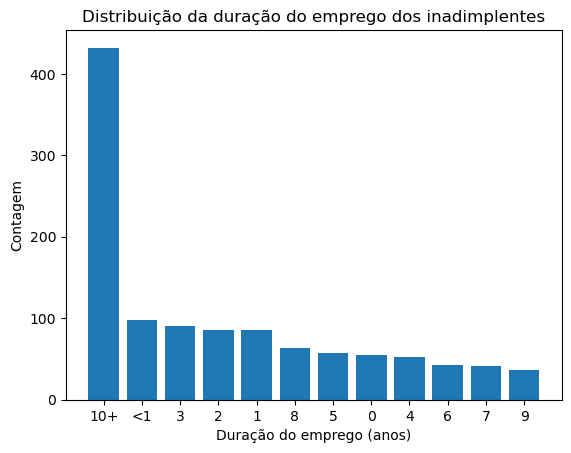

In [91]:
df_inadimplentes = df_limpo[df_limpo['acc_now_delinq'] > 0]
contagem_emp_length = df_inadimplentes['emp_length'].value_counts()

plt.bar(contagem_emp_length.index, contagem_emp_length.values)
plt.title('Distribuição da duração do emprego dos inadimplentes')
plt.xlabel('Duração do emprego (anos)')
plt.ylabel('Contagem')
plt.show()

#### Tendo tais dados em vista, podemos verificar as medidas de tendência central para este conjunto de dados, sendo:
- Média (agrupamento dos valores dividido pela contagem)
- Mediana (valor que divide a distribuição em duas partes iguais)
- Moda (valor de maior ocorrência)

Média



In [92]:
df_contagem = pd.DataFrame(contagem_emp_length).reset_index()
df_contagem['emp_length'] = df_contagem['emp_length'].apply(lambda x: x.replace('+','').replace('<',''))
df_contagem['emp_length'] = df_contagem['emp_length'].astype(int)
df_contagem['emp_length x count'] = df_contagem['emp_length'] * df_contagem['count']
df_contagem

numerador = df_contagem['emp_length x count'].sum()
denominador = df_contagem['count'].sum()
media = numerador/denominador

print(f'A média de tempo de emprego entre os inadimplentes é de {round(media,1)} anos')    

A média de tempo de emprego entre os inadimplentes é de 6.0 anos


Mediana
- Analisando o conjunto de dados, temos:

In [97]:
contagem_emp_length

emp_length
10+    432
<1      98
3       90
2       86
1       85
8       63
5       57
0       55
4       53
6       43
7       42
9       37
Name: count, dtype: int64

- Precisamos, então, distribuir os dados para obter o valor central e saber qual a mediana

In [96]:
contagem = 0
dados = list(contagem_emp_length.values)

for i in range(10):
    #Cria uma lista que contém o valor de i repetido N vezes. Por exemplo, se i for 3 e dados[i] for 90, será criada uma lista com o valor 3 repetido 90 vezes
    contagem = [i] * dados[i]
mediana = np.median(contagem)

print(f'A mediana de tempo de emprego entre os inadimplentes é de {mediana} anos')


A mediana de tempo de emprego entre os inadimplentes é de 9.0 anos


Moda
- Como a moda é o valor que mais se repete no conjunto de dados e, de acordo com o value_counts, temos 432 ocorrências de 10+, então a moda é 10+


2 member_id: Para identificar o mutuário que solicitou o empréstimo.

3 load_amnt: O valor listado do empréstimo solicitado pelo mutuário.

5 term: O número de pagamentos do empréstimo. Os valores estão em meses e podem ser 36 ou 60.

6 int_rate: Taxa de juros do empréstimo

7 installment: O pagamento mensal devido pelo mutuário se o empréstimo for originado.

8 grade: Grau de empréstimo atribuído ao LC que depende da pontuação de crédito do mutuário.

9 sub_grade: Subclasse de empréstimo atribuído a LC

10 emp_title : O cargo fornecido pelo Mutuário ao solicitar o empréstimo.

11 emp_length : Duração do emprego em anos. Os valores possíveis estão entre 0 e 10, onde 0 significa menos de um ano e 10 significa dez ou mais anos.

12 home_ownership: O status de propriedade da casa fornecido pelo mutuário durante o registro ou obtido no relatório de crédito. Nossos valores são: ALUGUEL, PRÓPRIO, HIPOTECA, OUTROS

13 anual_inc: A renda anual autodeclarada fornecida pelo mutuário durante o registro.

14 verification_status: Indica se a renda foi verificada por LC, não verificada, ou se a fonte de renda foi verificada

15 issue_d: O mês em que o empréstimo foi financiado

16 loan_status: Status atual do empréstimo

18 title: Explicando a ‘finalidade’ do empréstimo.

19 dti: A razão dívida / rendimento é  entre quanto o mutuário deve todos os meses e o rendimento do mutuário todos os meses.

20 delinq_2yrs: O número de inadimplências (parcelas atrasadas) do mutuário nos últimos 2 anos.

21 early_cr_line : o mês/ano em que a primeira linha de crédito informada do mutuário foi aberta

22 inq_last_6mths: Consultas sobre empréstimos feitos pelo mutuário nos últimos 6 meses.

23 mths_since_last_delinq: Meses que se passaram desde a última vez que o mutuário perdeu o pagamento pontual da parcela.

24 open_acc: O número de linhas de crédito abertas no arquivo de crédito do mutuário.

25 pub_rec Número de registros públicos depreciativos

26 revol_bal: Saldo rotativo de crédito total

27 revol_util : Taxa de utilização da linha rotativa ou a quantidade de crédito que o mutuário está usando em relação a todo o crédito rotativo disponível.

28 total_acc: O número total de linhas de crédito atualmente no arquivo de crédito do mutuário

29 inicial_list_status: O status de listagem inicial do empréstimo. Os valores possíveis são – W (inteiro), F (fracionário)

30 out_prncp: Principal pendente restante para o valor total financiado

31 total_pymnt : Pagamentos recebidos até o momento pelo valor total financiado.

32 total_rec_prncp: Principal recebido até a data.

33 total_rec_int Juros recebidos até o momento.

34 total_rec_late_fee : Taxas atrasadas recebidas até o momento.

35 recuperações: Total de procedimentos de recuperação iniciados contra o mutuário.

36 collection_recovery_fee : As taxas cobradas durante os procedimentos de recuperação.

37 last_pymnt_d O último mês em que o pagamento foi recebido.

38 last_pymnt_amnt: O último valor do pagamento recebido.

39 next_pymnt_d: Próxima data de pagamento agendada.

40 last_credit_pull_d: O mês mais recente que LC retirou crédito para este empréstimo

42 mths_since_last_major_derog: meses desde a inadimplência de 90 dias mais recente ou classificação pior

43 application_type: Indica se o empréstimo é um pedido individual ou um pedido conjunto com dois co-mutuários

44 anual_inc_joint: A renda anual combinada autodeclarada fornecida pelos co-mutuários durante o registro

45 dti_joint : Um índice calculado usando o total de pagamentos mensais dos co-mutuários sobre o total das obrigações da dívida, excluindo hipotecas e o empréstimo em ML solicitado, dividido pela renda mensal combinada declarada pelos co-mutuários

46 acc_now_delinq: O número de contas nas quais o mutuário está inadimplente

47 tot_coll_amt: Valores totais de cobrança já devidos pelo mutuário

48 tot_cur_bal: Saldo atual total de todas as contas de propriedade do mutuário

49 total_rev_hi_lim : Total de crédito alto/limite de crédito